# PRODIGY INFOTECH
# PRODIGY_DS_02


### GOPIKA K.V. | DATA SCIENCE INTERN

Task 2 : Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("task_2_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# to check for missing values
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
# Age, cabin and embarked have missing values
# to find the total number of missing values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Median imputation for Age
df['Age'] = df['Age'].fillna(df['Age'].median())
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
# Using conditional imputation for Cabin based upon the Pclass.
# Conditional imputation is used here instead of mode as there are many missing values .
def fill_cabin(pclass,cabin):
    if pd.isnull(cabin):
        if pclass ==1:
            return 'A'
        elif pclass==2:
            return 'B'
        elif pclass==3:
            return "C"
    else:
        return cabin

df["Cabin"]=df.apply(lambda row :fill_cabin(row["Pclass"],row["Cabin"]),axis=1)
df["Cabin"]                  

0         C
1       C85
2         C
3      C123
4         C
       ... 
886       B
887     B42
888       C
889    C148
890       C
Name: Cabin, Length: 891, dtype: object

In [10]:
# Mode imputation for Embarked 
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
# checking for any missing values after the imputation
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

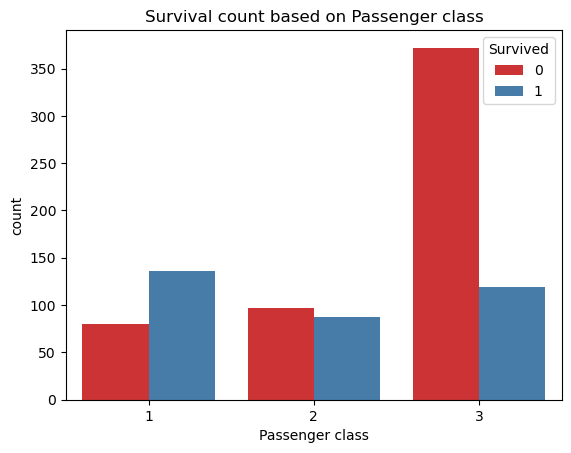

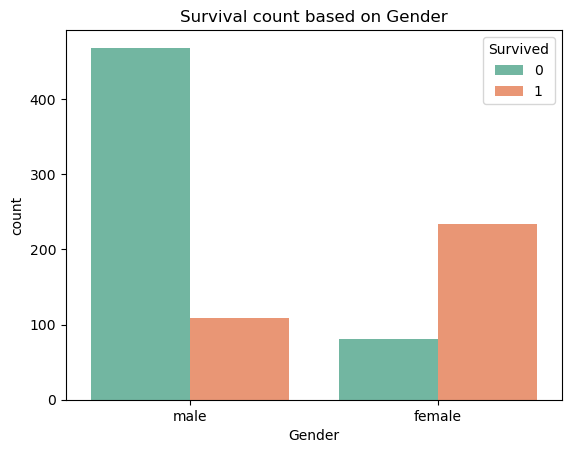

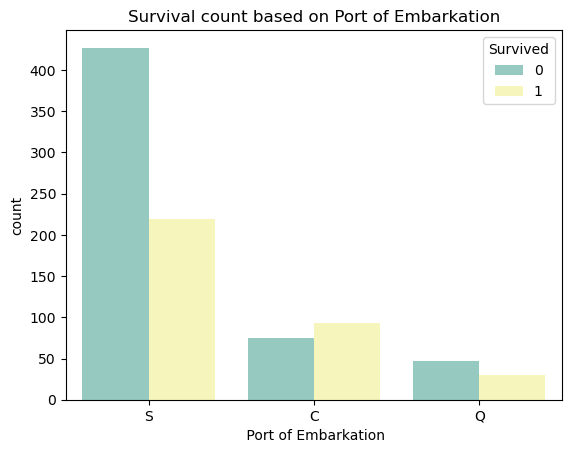

In [12]:
# Bivariate Analysis between pairs of features and Survived(Target Variable)

# Relatitionship between Pclass and Survived
sns.countplot(x="Pclass",hue = 'Survived',data=df,palette='Set1')
plt.title("Survival count based on Passenger class")
plt.xlabel("Passenger class")
plt.ylabel("count")
plt.show()

#Relatitionship between Sex and Survived
sns.countplot(x="Sex",hue="Survived",data=df,palette="Set2")
plt.title("Survival count based on Gender")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

#Relatitionship between Embarked and Survived
sns.countplot(x="Embarked",hue="Survived",data=df,palette="Set3")
plt.title("Survival count based on Port of Embarkation")
plt.xlabel(" Port of Embarkation")
plt.ylabel("count")
plt.show()


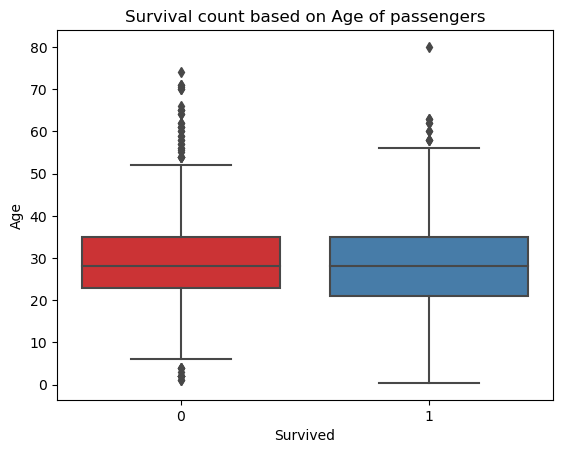

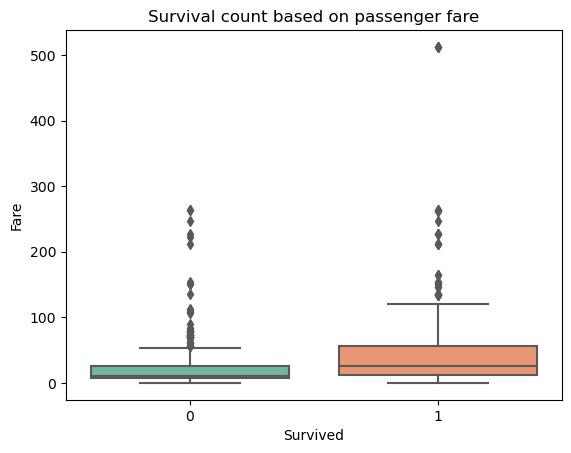

In [13]:
#Boxplot for Survived and Age
sns.boxplot(x="Survived",y="Age",data=df,palette= "Set1")
plt.title("Survival count based on Age of passengers")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()
#Boxplot for Survived and Fare
sns.boxplot(x="Survived",y="Fare",data=df,palette= "Set2")
plt.title("Survival count based on passenger fare")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

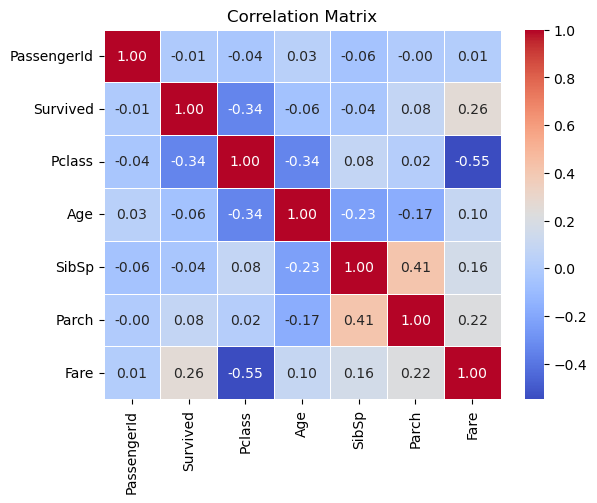

In [18]:
#correlation Analysis
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

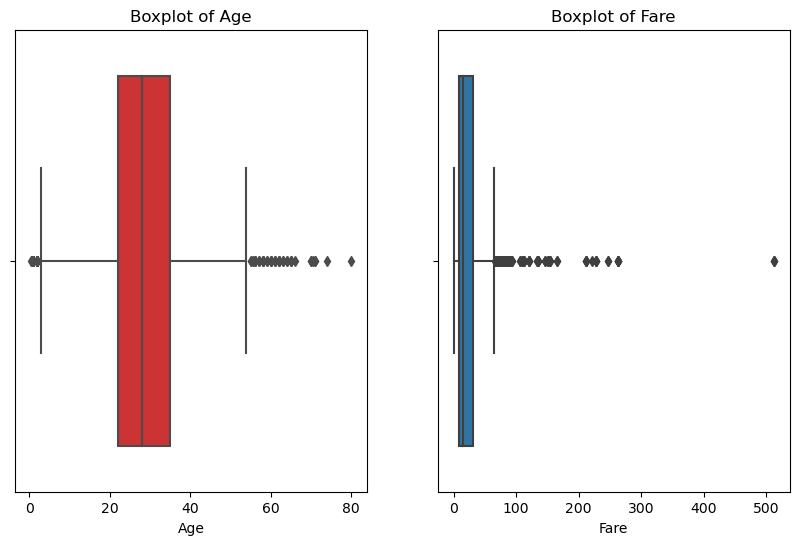

In [15]:
#Outlier detection (using box plots)
# For Age
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Age', data=df,palette='Set1')
plt.title('Boxplot of Age')
# For Fare
plt.subplot(1, 2, 2)
sns.boxplot(x='Fare', data=df)
plt.title('Boxplot of Fare')
plt.show()

In [16]:
# Regression analysis

# Assume 'Age', 'Fare', and 'Pclass' as independent variables
X = df[['Age', 'Fare', 'Pclass']]
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predict survival on the test set
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

# Calculate accuracy
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")


Accuracy:0.7374301675977654
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       105
           1       0.76      0.53      0.62        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.71       179
weighted avg       0.74      0.74      0.73       179



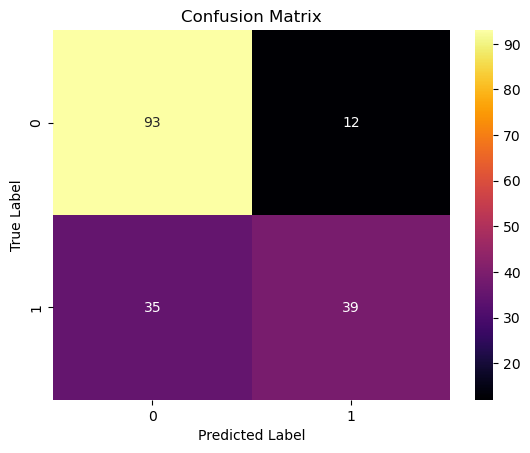

In [17]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()